In [1]:
import datetime as dt
import pandas as pd

import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_excel('dailyconsume_id1.xlsx')
df_offpeak = df.drop(columns=['date','peak_measurements'])
df_peak = df.drop(columns=['date','offpeak_measurements'])

df_offpeak.head()

,offpeak_measurements,week_of_the_year,day_of_the_week
0,0.587758,14,4
1,0.595823,14,5
2,0.603288,14,6
3,0.520695,14,7
4,0.515403,15,1


In [3]:
df_offpeak_thursday = df_offpeak.drop(df_offpeak[(df_offpeak['day_of_the_week'] != 5)].index)
df_offpeak_thursday.head()

,offpeak_measurements,week_of_the_year,day_of_the_week
1,0.595823,14,5
8,0.579191,15,5
15,0.563598,16,5
22,0.538209,17,5
29,0.558841,18,5


<AxesSubplot:xlabel='week_of_the_year', ylabel='offpeak_measurements'>

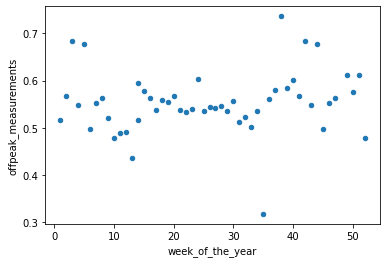

In [4]:
df_offpeak_thursday.plot.scatter(x="week_of_the_year", y="offpeak_measurements", xlabel = 'mês do ano',ylabel='consumo fora ponta')

In [5]:
X = df_offpeak_thursday.iloc[:, 0:2].values
X

array([[ 0.5958225, 14.       ],
       [ 0.5791905, 15.       ],
       [ 0.563598 , 16.       ],
       [ 0.538209 , 17.       ],
       [ 0.5588415, 18.       ],
       [ 0.5548725, 19.       ],
       [ 0.568575 , 20.       ],
       [ 0.537957 , 21.       ],
       [ 0.534492 , 22.       ],
       [ 0.5390595, 23.       ],
       [ 0.603603 , 24.       ],
       [ 0.5350905, 25.       ],
       [ 0.5435325, 26.       ],
       [ 0.541926 , 27.       ],
       [ 0.5472495, 28.       ],
       [ 0.5347125, 29.       ],
       [ 0.55755  , 30.       ],
       [ 0.51282  , 31.       ],
       [ 0.522081 , 32.       ],
       [ 0.5023935, 33.       ],
       [ 0.5349015, 34.       ],
       [ 0.3174885, 35.       ],
       [ 0.5618025, 36.       ],
       [ 0.5807025, 37.       ],
       [ 0.736344 , 38.       ],
       [ 0.583632 , 39.       ],
       [ 0.6014925, 40.       ],
       [ 0.568197 , 41.       ],
       [ 0.684747 , 42.       ],
       [ 0.5478795, 43.       ],
       [ 0

1 11384.99240371929
2 2850.321943901176
3 1320.2961761683398
4 751.1926922850026
5 479.86268058604406
6 328.64605458837366
7 244.7507019558462
8 191.0723650240343
9 168.2896259242291
10 125.1606706916137
11 101.24299978991917
12 88.6430147977004
13 81.15722033286882
14 63.95260355231664
15 62.95665660019141
16 50.3036311660633
17 40.29204091157911
18 37.910553801953135
19 37.33755776393521


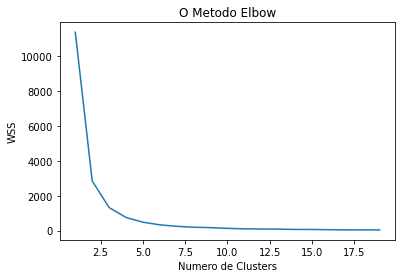

In [6]:
from sklearn.cluster import KMeans
wcss = []
 
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    print(i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 20), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [7]:
k_means = KMeans(n_clusters=12)
model = k_means.fit(X)

y_hat = k_means.predict(X)

In [8]:
from sklearn import metrics
labels = k_means.labels_
metrics.silhouette_score(X, labels, metric = 'euclidean')

0.45673459796613736

In [9]:
metrics.calinski_harabasz_score(X, labels)


519.4620509090729

In [10]:
centers = k_means.cluster_centers_
centers

array([[ 0.6348825 , 40.        ],
       [ 0.53202713, 14.        ],
       [ 0.5348826 , 30.        ],
       [ 0.5992938 ,  3.        ],
       [ 0.569709  , 50.5       ],
       [ 0.54502088, 21.5       ],
       [ 0.53387775,  7.5       ],
       [ 0.4994577 , 35.        ],
       [ 0.556038  , 25.5       ],
       [ 0.5682159 , 45.        ],
       [ 0.55388025, 17.5       ],
       [ 0.486024  , 11.        ]])

Text(0, 0.5, 'Medição de consumo em fora ponta')

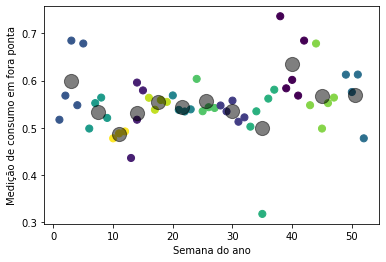

In [11]:
plt.scatter(X[:, 1], X[:, 0], c=y_hat, s=50, cmap='viridis')
plt.scatter(centers[:, 1], centers[:, 0], c='black', s=200, alpha=0.5)
plt.xlabel("Semana do ano")
plt.ylabel("Medição de consumo em fora ponta")